<a href="https://www.kaggle.com/code/vishwasharish/notebookf725af4d17?scriptVersionId=202776876" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
def preprocess_titanic_data(df, is_test=False):

    data = df.copy()
    
    data['Age'] = data['Age'].fillna(data['Age'].median())
    data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
    data['Fare'] = data['Fare'].fillna(data['Fare'].median())

    passenger_ids = None
    if is_test:
        passenger_ids = data['PassengerId']

    data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

    le = LabelEncoder()
    data['Sex'] = le.fit_transform(data['Sex'])
    data['Embarked'] = le.fit_transform(data['Embarked'])
    
    return (data, passenger_ids) if is_test else data


In [3]:
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
processed_train = preprocess_titanic_data(train_df)
processed_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [6]:
processed_test, passenger_ids = preprocess_titanic_data(test_df, is_test=True)
processed_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


In [7]:
X_train = processed_train.drop('Survived', axis=1)
y_train = processed_train['Survived']

In [8]:
def train_and_visualize_decision_tree(X, y):
    dt = DecisionTreeClassifier(random_state=42, max_depth=4)
    dt.fit(X, y)

    plt.figure(figsize=(20,10))

    plot_tree(dt, 
              feature_names=X.columns,
              class_names=['Not Survived', 'Survived'],
              filled=True,
              rounded=True,
              fontsize=10,
              precision=2)
    
    plt.title('Decision Tree for Titanic Survival Prediction', pad=20, size=16)
    plt.tight_layout()
    plt.show()
    
    return dt

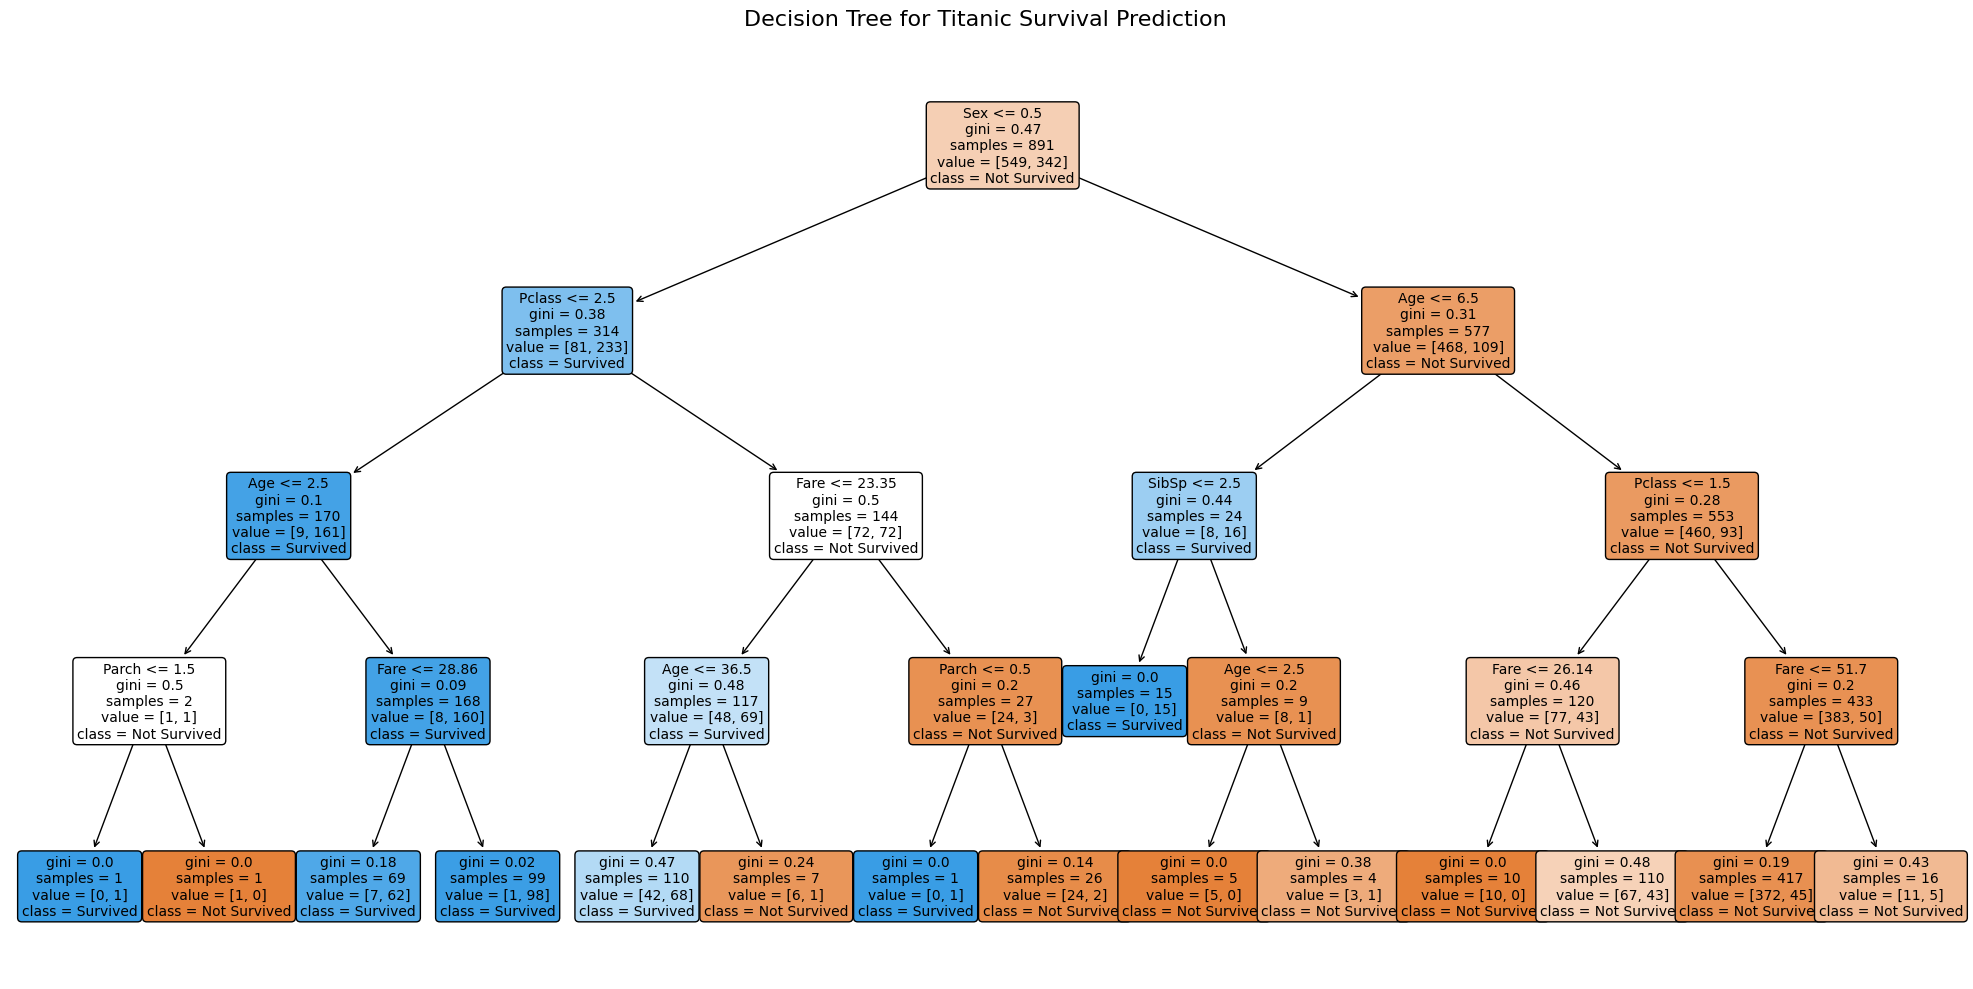

In [9]:
dt_model = train_and_visualize_decision_tree(X_train, y_train)

In [10]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=4)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=42)

In [11]:
def evaluate_models(X, y):
    dt = DecisionTreeClassifier(random_state=42, max_depth=4)
    rf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=4)
    
    # Perform 5-fold cross-validation
    dt_scores = cross_val_score(dt, X, y, cv=5)
    rf_scores = cross_val_score(rf, X, y, cv=5)
    
    return dt_scores, rf_scores

dt_scores, rf_scores = evaluate_models(X_train, y_train)

print(f"Decision Tree Average Accuracy: {dt_scores.mean() * 100:.2f}%")
print(f"Random Forest Average Accuracy: {rf_scores.mean() * 100:.2f}%")

Decision Tree Average Accuracy: 80.48%
Random Forest Average Accuracy: 80.59%


In [12]:
def make_predictions(dt_model, rf_model, X_test):

    dt_predictions = dt_model.predict(X_test)
    rf_predictions = rf_model.predict(X_test)
    
    return dt_predictions, rf_predictions

dt_predictions, rf_predictions = make_predictions(dt_model, rf_model, processed_test)

dt_submission = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': dt_predictions
})
rf_submission = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': rf_predictions
})

dt_submission.to_csv('decision_tree_predictions.csv', index=False)
rf_submission.to_csv('random_forest_predictions.csv', index=False)

In [13]:
rf_submission.to_csv('submission.csv', index=False)